# 【問題1】BoWのスクラッチ実装
以下の3文のBoWを求められるプログラムをscikit-learnを使わずに作成してください。1-gramと2-gramで計算してください。


In [1]:
small_datasets = \
['This movie is SOOOO funny!!!',
'What a movie! I never',
'best movie ever!!!!! this movie']

In [2]:
small_datasets[0].split(' ')

['This', 'movie', 'is', 'SOOOO', 'funny!!!']

In [15]:
# ユニグラム
import numpy as np
import re

def bow(small_datasets):
    str_list = []
    
    # リストの中の文字を分割
    for i,j in enumerate(small_datasets):
        data_split = small_datasets[i].split(' ')
        for k in range(len(data_split)):
            data_split[k] = re.sub('[!+]', "", data_split[k])
            str_list.append(data_split[k].lower())
    
    str_list = np.array(str_list)
    str_list = np.unique(str_list)
    print(str_list)
    
    # サイズを生成
    data = np.zeros((len(small_datasets), len(str_list)))
    
    for i in range(data.shape[0]):
        data_split = small_datasets[i].split(' ')
        
        length = len(data_split)
        for k in range(length):
            data_split[k] = re.sub('[!+]', "", data_split[k])
            #print(data_split[k])
            for j in range(data.shape[1]):
                if str_list[j] == data_split[k].lower():
                    data[i,j] += 1
                else:
                    data[i,j] += 0
    return data       
data = bow(small_datasets).astype(np.int)
df = pd.DataFrame(data, columns=vectorizer.get_feature_names())
df

['a' 'best' 'ever' 'funny' 'i' 'is' 'movie' 'never' 'soooo' 'this' 'what']


a  best  ever  funny  i  is  movie  never  soooo  this  what
0  0     0     0      1  0   1      1      0      1     1     0
1  1     0     0      0  1   0      1      1      0     0     1
2  0     1     1      0  0   0      2      0      0     1     0

In [16]:
# 上記と一致のため問題なし
vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b')  #　大文字を小文字に揃える処理有
bow = vectorizer.fit_transform(small_datasets).toarray()
print(bow)
df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
df

[[0 0 0 1 0 1 1 0 1 1 0]
 [1 0 0 0 1 0 1 1 0 0 1]
 [0 1 1 0 0 0 2 0 0 1 0]]


a  best  ever  funny  i  is  movie  never  soooo  this  what
0  0     0     0      1  0   1      1      0      1     1     0
1  1     0     0      0  1   0      1      1      0     0     1
2  0     1     1      0  0   0      2      0      0     1     0

In [22]:
# バイグラム
import numpy as np
import re

def bow(small_datasets):
    str_list = []
    str_list2 = []

    
    # リストの中の文字を分割
    for i,j in enumerate(small_datasets):
        data_split = small_datasets[i].split(' ')
        for k in range(len(data_split)):
            data_split[k] = re.sub('[!+]', "", data_split[k])
            data_split[k] = data_split[k].lower()
        str_list.append(data_split)

    #print(str_list)
    
    for i, pair_list in enumerate(str_list):
        for k in range(len(data_split)-1):
            str_list2.append(pair_list[k:k+2])
    
    str_list_shape = np.array(str_list)
    #print(str_list_shape.shape[1])
    str_list = str_list_shape.flatten()
    str_list2 = np.array(str_list2) # データ
    #print(str_list2)
    str_list2_unique = np.unique(str_list2, axis=0) # カラム
    #print(str_list)
    #print(str_list2_unique)
    #print(all(str_list2[11] == str_list2_unique[10]))
    
    data = np.zeros((len(small_datasets), len(str_list2_unique)))
    #print(data.shape)
    for i in range(data.shape[0]):
        for k in range(str_list_shape.shape[1]-1):# 4
            for j in range(data.shape[1]): #11
                if all(str_list2[(str_list_shape.shape[1]-1)*i+k] == str_list2_unique[j]):
                    data[i,j] += 1
                else:
                    data[i,j] += 0
    return data       

data = bow(small_datasets).astype(np.int)

df = pd.DataFrame(data, columns=vectorizer.get_feature_names())
display(df)

a movie  best movie  ever this  i never  is soooo  movie ever  movie i  \
0        0           0          0        0         1           0        0   
1        1           0          0        1         0           0        1   
2        0           1          1        0         0           1        0   

   movie is  soooo funny  this movie  what a  
0         1            1           1       0  
1         0            0           0       1  
2         0            0           1       0

In [23]:
# ngram_rangeで利用するn-gramの範囲を指定する
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'(?u)\b\w+\b')
bow_train = (vectorizer.fit_transform(small_datasets)).toarray()
print(bow_train.shape)
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

# スクラッチと同じ計算

(3, 11)


a movie  best movie  ever this  i never  is soooo  movie ever  movie i  \
0        0           0          0        0         1           0        0   
1        1           0          0        1         0           0        1   
2        0           1          1        0         0           1        0   

   movie is  soooo funny  this movie  what a  
0         1            1           1       0  
1         0            0           0       1  
2         0            0           1       0

In [17]:
small_datasets = \
['This movie is SOOOO funny!!!',
'What a movie! I never',
'best movie ever!!!!! this movie']

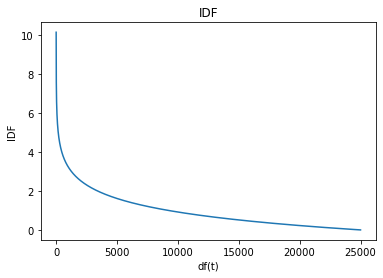

In [18]:
# idfの確認
import numpy as np
import matplotlib.pyplot as plt
n_samples = 25000
idf = np.log(n_samples/np.arange(1,n_samples))
plt.title("IDF")
plt.xlabel("df(t)")
plt.ylabel("IDF")
plt.plot(idf)
plt.show()

# トークンの出現回数が低い程、idfは大きくなる。

In [19]:
# ストップワード除去
vectorizer = CountVectorizer(stop_words=["is"], token_pattern=r'\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

a  bad  film  good  movie  this  very
0  0    0     0     1      1     1     1
1  1    0     1     1      0     1     0
2  0    2     0     0      0     0     3

In [20]:
# はじめて使う場合はストップワードをダウンロード
import nltk
stop_words = nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print("stop word : {}".format(stop_words)) # 'i', 'me', 'my', ...

stop word : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yuki.tatsuoka/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 【問題2】TF-IDFの計算
IMDB映画レビューデータセットをTF-IDFによりベクトル化してください。NLTKのストップワードを利用し、最大の語彙数は5000程度に設定してください。テキストクリーニングやステミングなどの前処理はこの問題では要求しません。


TF-IDFの計算にはscikit-learnの以下のどちらかのクラスを使用してください。

In [2]:
# IMDBをカレントフォルダにダウンロード
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
# 解凍
!tar zxf aclImdb_v1.tar.gz
# aclImdb/train/unsupはラベル無しのため削除
!rm -rf aclImdb/train/unsup
# IMDBデータセットの説明を表示t

--2021-04-09 18:40:28--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
ai.stanford.edu (ai.stanford.edu) をDNSに問いあわせています... 171.64.68.10
ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 84125825 (80M) [application/x-gzip]
`aclImdb_v1.tar.gz' に保存中

aclImdb_v1.tar.gz   100%[===================>]  80.23M  2.98MB/s 時間 31s        

2021-04-09 18:40:59 (2.56 MB/s) - `aclImdb_v1.tar.gz' へ保存完了 [84125825/84125825]



In [2]:
from sklearn.datasets import load_files
train_review = load_files('./aclImdb/train/', encoding='utf-8')
x_train, y_train = train_review.data, train_review.target
test_review = load_files('./aclImdb/test/', encoding='utf-8')
x_test, y_test = test_review.data, test_review.target
# ラベルの0,1と意味の対応の表示
print(train_review.target_names)

['neg', 'pos']


In [21]:
x_test
y_test

array([1, 0, 1, ..., 0, 0, 0])

In [22]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

tfidf = TfidfVectorizer(token_pattern=r'(?u)\b\w+\b',stop_words=stop_words, max_features=5000)
train_tfidf = tfidf.fit_transform(x_train).toarray()
test_tfidf = tfidf.transform(x_test).toarray()

In [24]:
train_tfidf.shape, test_tfidf.shape

((25000, 5000), (25000, 5000))

In [25]:
df = pd.DataFrame(train_tfidf, columns=tfidf.get_feature_names())
df

0   00  000         1        10       100   11   12   13  13th  ...  \
0      0.0  0.0  0.0  0.000000  0.000000  0.000000  0.0  0.0  0.0   0.0  ...   
1      0.0  0.0  0.0  0.000000  0.000000  0.000000  0.0  0.0  0.0   0.0  ...   
2      0.0  0.0  0.0  0.000000  0.124442  0.000000  0.0  0.0  0.0   0.0  ...   
3      0.0  0.0  0.0  0.000000  0.085006  0.000000  0.0  0.0  0.0   0.0  ...   
4      0.0  0.0  0.0  0.000000  0.000000  0.000000  0.0  0.0  0.0   0.0  ...   
...    ...  ...  ...       ...       ...       ...  ...  ...  ...   ...  ...   
24995  0.0  0.0  0.0  0.000000  0.000000  0.052273  0.0  0.0  0.0   0.0  ...   
24996  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.0  0.0  0.0   0.0  ...   
24997  0.0  0.0  0.0  0.000000  0.068246  0.000000  0.0  0.0  0.0   0.0  ...   
24998  0.0  0.0  0.0  0.101521  0.000000  0.000000  0.0  0.0  0.0   0.0  ...   
24999  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.0  0.0  0.0   0.0  ...   

           york     young  younger  youth    z      zero  zizek  zombie  \
0      0.000000  0.164505      0.0    0.0  0.0  0.136932    0.0     0.0   
1      0.000000  0.000000      0.0    0.0  0.0  0.000000    0.0     0.0   
2      0.000000  0.000000      0.0    0.0  0.0  0.000000    0.0     0.0   
3      0.000000  0.000000      0.0    0.0  0.0  0.000000    0.0     0.0   
4      0.000000  0.000000      0.0    0.0  0.0  0.000000    0.0     0.0   
...         ...       ...      ...    ...  ...       ...    ...     ...   
24995  0.095763  0.000000      0.0    0.0  0.0  0.000000    0.0     0.0   
24996  0.000000  0.000000      0.0    0.0  0.0  0.000000    0.0     0.0   
24997  0.000000  0.000000      0.0    0.0  0.0  0.000000    0.0     0.0   
24998  0.000000  0.000000      0.0    0.0  0.0  0.000000    0.0     0.0   
24999  0.000000  0.000000      0.0    0.0  0.0  0.000000    0.0     0.0   

       zombies  zone  
0          0.0   0.0  
1          0.0   0.0  
2          0.0   0.0  
3          0.0   0.0  
4          0.0   0.0  
...        ...   ...  
24995      0.0   0.0  
24996      0.0   0.0  
24997      0.0   0.0  
24998      0.0   0.0  
24999      0.0   0.0  

[25000 rows x 5000 columns]

# 【問題3】TF-IDFを用いた学習
問題2で求めたベクトルを用いてIMDB映画レビューデータセットの学習・推定を行なってください。モデルは2値分類が行える任意のものを利用してください。


ここでは精度の高さは求めませんが、最大の語彙数やストップワード、n-gramの数を変化させて影響を検証してみてください。



In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logi = LogisticRegression()
model = logi.fit(train_tfidf, y_train)

pred = model.predict(test_tfidf)

In [27]:
print(pred)
accuracy_score(pred, y_test)
# そこそこ精度高め。

[1 0 1 ... 0 0 0]


0.88372

In [28]:
# 次元を選択せずに実行
tfidf = TfidfVectorizer(token_pattern=r'(?u)\b\w\w+\b',
                        stop_words=stop_words, 
                        #ngram_range=(2,2), 次元が増えて不可
                        min_df=0.01, # 出現率が0.01以下のものは消す
                        #max_df = 0.9
                       )
train_tfidf = tfidf.fit_transform(x_train).toarray()
test_tfidf = tfidf.transform(x_test).toarray()
train_tfidf.shape

(25000, 1673)

In [29]:
test_tfidf.shape

(25000, 1673)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logi = LogisticRegression()
model = logi.fit(train_tfidf, y_train)

In [31]:
pred = model.predict(test_tfidf)

In [32]:
print(pred)
accuracy_score(pred, y_test)
# 次元を減らしすぎると減少した。

[1 0 1 ... 0 0 0]


0.87344

In [33]:
import gc

del model
gc.collect()

2486

In [76]:
# 次元を選択せずに実行
tfidf = TfidfVectorizer(token_pattern=r'(?u)\b\w+\b',
                        stop_words=stop_words, 
                        #min_df=0.001, # 削除したい頻出頻度の低い割合
                        max_df = 0.1 # 削除したい頻出頻度の高い割合
                       )
train_tfidf = tfidf.fit_transform(x_train).toarray()
test_tfidf = tfidf.transform(x_test).toarray()
train_tfidf.shape

(25000, 74624)

In [77]:
test_tfidf.shape

(25000, 74624)

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logi = LogisticRegression()
model = logi.fit(train_tfidf, y_train)

In [79]:
% time
pred = model.predict(test_tfidf)

In [80]:
print(pred)
accuracy_score(pred, y_test)
# zigenn5000と比較した場合ほんのり向上。

[1 0 1 ... 0 0 0]


0.87548

# 【問題4】TF-IDFのスクラッチ実装
以下の3文のTF-IDFを求められるプログラムをscikit-learnを使わずに作成してください。標準的な式と、scikit-learnの採用している式の2種類を作成してください。正規化は不要です。

In [34]:
small_datasets = \
['This movie is SOOOO funny!!!',
'What a movie! I never',
'best movie ever!!!!! this movie']

In [74]:
# ユニグラム
# 関数を割っても良き
import numpy as np
import re

def tf(small_datasets):
    str_list = []
    
    # リストの中の文字を分割
    for i,j in enumerate(small_datasets):
        data_split = small_datasets[i].split(' ')
        for k in range(len(data_split)):
            data_split[k] = re.sub('[!+]', "", data_split[k])
            str_list.append(data_split[k].lower())
    
    str_list = np.array(str_list)
    #print(str_list)
    str_list = np.unique(str_list)
    print(str_list)
    
    # サイズを生成
    tf = np.zeros((len(small_datasets), len(str_list)))
    
    for i in range(data.shape[0]):
        data_split = small_datasets[i].split(' ')
        length = len(data_split)
        for k in range(length):
            data_split[k] = re.sub('[!+]', "", data_split[k])
            sample_count = data_split.count(data_split[k])
            for j in range(data.shape[1]):
                sum_token = np.count_nonzero(data[:, j])
                if str_list[j] == data_split[k].lower():
                    tf[i,j] = sample_count#*(np.log((data.shape[0]+1)/(sum_token+1))+1)
                else:
                    tf[i,j] += 0
    return tf 

def idf(tf):
    idf = np.zeros((data.shape[0], data.shape[1]))
    
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            sum_token = np.count_nonzero(data[:, j])

            if tf[i, j] >=1:
                idf[i,j] = np.log((1+data.shape[0])/(1+sum_token)) + 1
            else:
                pass
    return idf
    
tf = tf(small_datasets).astype(np.float)
idf = idf(data)

df = pd.DataFrame(tf*idf, columns=tfidf.get_feature_names())
df

['a' 'best' 'ever' 'funny' 'i' 'is' 'movie' 'never' 'soooo' 'this' 'what']


a      best      ever     funny         i        is  movie  \
0  0.000000  0.000000  0.000000  1.693147  0.000000  1.693147    1.0   
1  1.693147  0.000000  0.000000  0.000000  1.693147  0.000000    1.0   
2  0.000000  1.693147  1.693147  0.000000  0.000000  0.000000    2.0   

      never     soooo      this      what  
0  0.000000  1.693147  1.287682  0.000000  
1  1.693147  0.000000  0.000000  1.693147  
2  0.000000  0.000000  1.287682  0.000000

In [39]:
tfidf = TfidfVectorizer(token_pattern=r'(?u)\b\w+\b', norm=False)
small_tfidf = tfidf.fit_transform(small_datasets).toarray()

df =pd.DataFrame(small_tfidf, columns=tfidf.get_feature_names())
df

a      best      ever     funny         i        is  movie  \
0  0.000000  0.000000  0.000000  1.693147  0.000000  1.693147    1.0   
1  1.693147  0.000000  0.000000  0.000000  1.693147  0.000000    1.0   
2  0.000000  1.693147  1.693147  0.000000  0.000000  0.000000    2.0   

      never     soooo      this      what  
0  0.000000  1.693147  1.287682  0.000000  
1  1.693147  0.000000  0.000000  1.693147  
2  0.000000  0.000000  1.287682  0.000000

In [41]:
from gensim.models import Word2Vec
sentences = [['this', 'movie', 'is', 'very', 'good'], ['this', 'film', 'is', 'a', 'good'], ['very', 'bad', 'very', 'very', 'bad']]
model = Word2Vec(min_count=1, vector_size=10) # 次元数を10に設定
model.build_vocab(sentences) # 準備(sentenceから語彙を構築)
model.train(sentences, total_examples=model.corpus_count, epochs=5) # 学習
#  total_examples = 文の数

print("語彙の一覧 : {}".format(model.wv.key_to_index))
for vocabs in model.wv.key_to_index:
    print("{}のベクトル : \n{}".format(vocabs, model.wv[vocabs]))

語彙の一覧 : {'very': 0, 'bad': 1, 'good': 2, 'is': 3, 'this': 4, 'a': 5, 'film': 6, 'movie': 7}
veryのベクトル : 
[-0.00536227  0.0023643   0.0510335   0.09009273 -0.0930295  -0.07116809
  0.06458871  0.08972988 -0.05015428 -0.03763373]
badのベクトル : 
[ 0.07380505 -0.01533473 -0.04536615  0.06554051 -0.0486016  -0.01816018
  0.0287658   0.00991874 -0.08285215 -0.09448819]
goodのベクトル : 
[ 0.07311766  0.05070262  0.06757693  0.00762866  0.06350889 -0.03405366
 -0.00946403  0.05768573 -0.07521639 -0.03936105]
isのベクトル : 
[-0.07511629 -0.00930048  0.09538178 -0.07319212 -0.02333784 -0.01937754
  0.08077486 -0.05930933  0.00045162 -0.04753765]
thisのベクトル : 
[-0.0960355   0.05007293 -0.08759587 -0.04391825 -0.000351   -0.00296183
 -0.0766124   0.09614742  0.04982056  0.09233143]
aのベクトル : 
[-0.08157919  0.04495797 -0.04137077  0.00824535  0.08498619 -0.04462178
  0.045175   -0.06786962 -0.03548489  0.09398508]
filmのベクトル : 
[-0.01577674  0.00321376 -0.04140681 -0.07682785 -0.01508028  0.02469826
 -0.00888039

/Users/yuki.tatsuoka/.pyenv/versions/anaconda3-2020.07/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


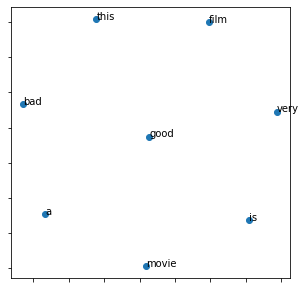

In [42]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
vocabs = model.wv.key_to_index
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
vectors_tsne = tsne_model.fit_transform(model.wv[vocabs])
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

# 【問題5】コーパスの前処理
コーパスの前処理として、特殊文字（!など）やURLの除去、大文字の小文字化といったことを行なってください。また、単語（トークン）はリストで分割してください。

In [43]:
train_list = []

for text in x_train[:1]:
    text = text.lower() # 小文字化
    text = text.replace('/', '').replace('-', '').\
    replace('<br />', '').replace('"', '').replace('', '').\
    replace('!', '').replace('?', '').replace('<br >', '')
    text = text.split(' ')
    for te in text:
        text = te.split()
        train_list.append(text)

In [46]:
train_list

[['zero'],
 ['day'],
 ['leads'],
 ['you'],
 ['to'],
 ['think,'],
 ['even'],
 ['rethink'],
 ['why'],
 ['two'],
 ['boysyoung'],
 ['men'],
 ['would'],
 ['do'],
 ['what'],
 ['they'],
 ['did'],
 [],
 ['commit'],
 ['mutual'],
 ['suicide'],
 ['via'],
 ['slaughtering'],
 ['their'],
 ['classmates.'],
 ['it'],
 ['captures'],
 ['what'],
 ['must'],
 ['be'],
 ['beyond'],
 ['a'],
 ['bizarre'],
 ['mode'],
 ['of'],
 ['being'],
 ['for'],
 ['two'],
 ['humans'],
 ['who'],
 ['have'],
 ['decided'],
 ['to'],
 ['withdraw'],
 ['from'],
 ['common'],
 ['civility'],
 ['in'],
 ['order'],
 ['to'],
 ['define'],
 ['their'],
 ['ownmutual'],
 ['world'],
 ['via'],
 ['coupled'],
 ['destruction.it'],
 ['is'],
 ['not'],
 ['a'],
 ['perfect'],
 ['movie'],
 ['but'],
 ['given'],
 ['what'],
 ['moneytime'],
 ['the'],
 ['filmmaker'],
 ['and'],
 ['actors'],
 ['had'],
 [],
 ['it'],
 ['is'],
 ['a'],
 ['remarkable'],
 ['product.'],
 ['in'],
 ['terms'],
 ['of'],
 ['explaining'],
 ['the'],
 ['motives'],
 ['and'],
 ['actions'],
 ['of']

# 【問題6】Word2Vecの学習
Word2Vecの学習を行なってください。

In [54]:
from gensim.models import Word2Vec
sentences = [['this', 'movie', 'is', 'very', 'good'], ['this', 'film', 'is', 'a', 'good'], ['very', 'bad', 'very', 'very', 'bad']]
model = Word2Vec(min_count=1, vector_size=10) # 次元数を10に設定
model.build_vocab(train_list) # 準備(sentenceから語彙を構築)
model.train(train_list, total_examples=model.corpus_count, epochs=5) # 学習
#  total_examples = 文の数
# 単語を全て[]で結ばないと判断できない

(236, 635)

In [55]:
print("語彙の一覧 : {}".format(model.wv.key_to_index))
for vocabs in model.wv.key_to_index:
    print("{}のベクトル : \n{}".format(vocabs, model.wv[vocabs]))

語彙の一覧 : {'a': 0, 'it': 1, 'of': 2, 'to': 3, 'is': 4, 'two': 5, 'the': 6, 'what': 7, 'in': 8, 'and': 9, 'being': 10, 'terms': 11, 'you': 12, 'their': 13, 'via': 14, 'but': 15, 'film': 16, 'than': 17, 'better': 18, 'humans': 19, 'beyond': 20, 'be': 21, 'decided': 22, 'for': 23, 'bizarre': 24, 'must': 25, 'mode': 26, 'have': 27, 'who': 28, 'honesty.': 29, 'slaughtering': 30, 'captures': 31, 'men': 32, 'day': 33, 'leads': 34, 'think,': 35, 'even': 36, 'rethink': 37, 'why': 38, 'boysyoung': 39, 'would': 40, 'classmates.': 41, 'do': 42, 'they': 43, 'did': 44, 'commit': 45, 'mutual': 46, 'suicide': 47, 'from': 48, 'withdraw': 49, 'define': 50, 'common': 51, 'young': 52, "'elephant'": 53, 'that': 54, 'gets': 55, 'under': 56, 'our': 57, "'rationalistic'": 58, 'skin': 59, 'far,': 60, 'far': 61, 'almost': 62, 'anything': 63, 'are': 64, 'likely': 65, 'see.': 66, 'flawed': 67, 'honest': 68, 'with': 69, 'suicidemurderers': 70, 'actions': 71, 'civility': 72, 'motives': 73, 'order': 74, 'terrible': 75

# 【問題7】（アドバンス課題）ベクトルの可視化
得られたベクトルをt-SNEにより可視化してください。また、いくつかの単語を選びwv.most_similarを用いて似ている単語を調べてください。


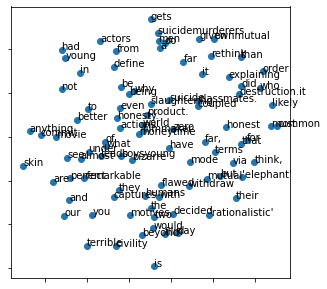

In [56]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
vocabs = model.wv.key_to_index
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
vectors_tsne = tsne_model.fit_transform(model.wv[vocabs])
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

In [60]:
model.wv.most_similar(positive='you')

[('perfect', 0.6747305989265442),
 ("'rationalistic'", 0.6512101888656616),
 ('they', 0.613173246383667),
 ('terrible', 0.5839093923568726),
 ('are', 0.5339248180389404),
 ('and', 0.5111488699913025),
 ('under', 0.46550050377845764),
 ('their', 0.4340832829475403),
 ('withdraw', 0.432702898979187),
 ('remarkable', 0.4326860010623932)]